# Funciones de cortante y momento

In [1]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols, simplify
E, I = symbols('E, I')
b = Beam(4, E, I)
b

## Aplicar cargas en la viga
Agregar cargas mediante `apply_load`. Los parámetros a pasar son:
`apply_load(value, start, order, end=None)`


### ORDER
- For point loads, order =-1
- For constant distributed load, order = 0
- For ramp loads, order = 1
- For parabolic ramp loads, order = 2

> Nota El usuario debe tener cuidado al ingresar valores de carga. La función de dibujo asume una convención de signos que se utiliza para trazar cargas. Dado un sistema de coordenadas de mano derecha con coordenadas XYZ, se supone que la longitud de la viga está a lo largo del eje X positivo. La función de dibujo reconoce las cargas positivas (con n> -2) como cargas que actúan a lo largo de la dirección Y negativa y momentos positivos que actúan a lo largo de la dirección Z positiva.

In [2]:
# momento aplicado en sentido horario al principio
b.apply_load(-3, 0, -2)
# carga de 4 N a 2m
b.apply_load(4, 2, -1)
# carga de 5 N a 2m
b.apply_load(5, 2, -1)

Agregar apoyos con `apply_support`, los cuales son tres diferentes tipos:
- `roller`
- `pin`
- `fixed`
> Hay una viga de 30 metros de longitud. Se aplica un momento de magnitud 120 Nm en el sentido de las agujas del reloj al final de su longitud. Se aplica una carga puntual de magnitud 8 N desde la parte superior de la viga en el punto de partida. Hay dos soportes simples debajo de la viga. Uno al final y otro a 10 metros del inicio. La deflexión está restringida en ambos apoyos.

In [18]:
E, I = symbols('E, I')
b = Beam(30, E, I)
# momento aplicado en sentido horario al principio
b.apply_load(120, 30, -2)
# carga de 8 N 
b.apply_load(-8, 0, -1)
# aplicar apoyos tipo roler
b.apply_support(10, 'roller')
b.apply_support(30, 'roller')
# variables de las reacciones
R_10, R_30 = symbols('R_10, R_30')
# calcular reaccinoes
b.solve_for_reaction_loads(R_10, R_30)

## Dibujar viga
Por medio de la función `draw`

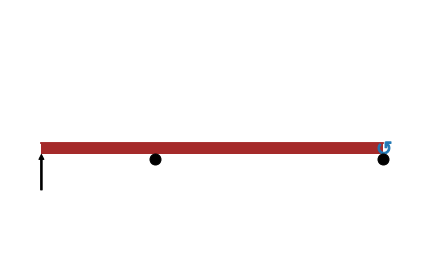

In [6]:
p = b.draw()
p.show()

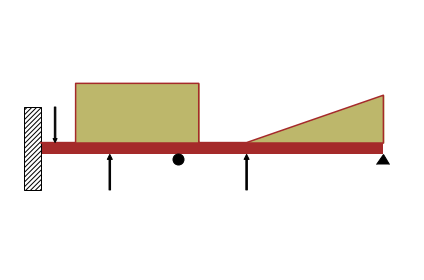

In [16]:
# EJEMPLO 2
R1, R2 = symbols('R1, R2')
# E, I = symbols('E, I')
b = Beam(50, 20, 30)
b.apply_load(10, 2, -1)
b.apply_load(R1, 10, -1)
b.apply_load(R2, 30, -1)
b.apply_load(90, 5, 0, 23)
b.apply_load(10, 30, 1, 50)
b.apply_support(50, "pin")
b.apply_support(0, "fixed")
b.apply_support(20, "roller")
p = b.draw()
p.show()

# Diagrama de momento
Se puede obtener de la viga por medio de la función `plot_bending_moment` 

> Hay una manga de 8 metros de largo. Se aplica una carga distribuida constante de 10 KN / m desde la mitad de la viga hasta el final. Hay dos soportes simples debajo de la viga, uno en el punto de inicio y otro en el punto final de la viga. También se aplica una carga puntual de magnitud 5 KN desde la parte superior del haz, a una distancia de 4 metros del punto de partida. Tome E = 200 GPa e I = 400 * (10 ** - 6) metro ** 4.

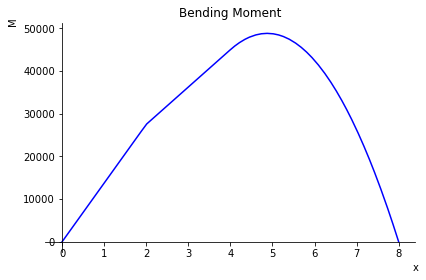

In [29]:
R1, R2 = symbols('R1, R2')
b = Beam(8, 200*(10**9), 400*(10**-6))
b.apply_load(5000, 2, -1)
b.apply_load(R1, 0, -1)
b.apply_load(R2, 8, -1)
b.apply_load(10000, 4, 0, end=8)
b.bc_deflection = [(0, 0), (8, 0)]
# resolver 
b.solve_for_reaction_loads(R1, R2)
b.plot_bending_moment()


# Diagrama de fuerza cortante
Se puede obtener de la viga por medio de la función `plot_shear_force` 

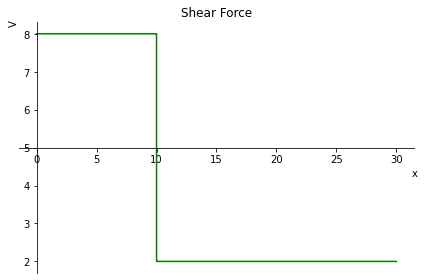

(Interval(0, 10), 8)

In [19]:
b.plot_shear_force()
b.max_shear_force()

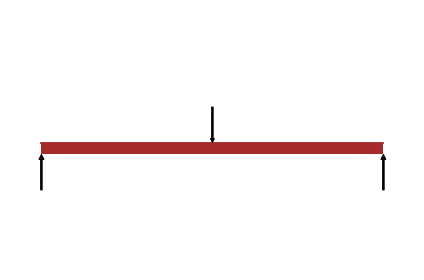

In [34]:
p = b.draw()
p.show()

# EJEMPLO PRÁCTICO

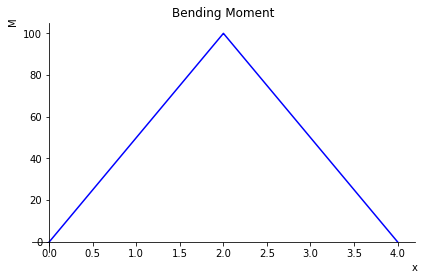

In [2]:
R1, R2 = symbols('R1, R2')
b = Beam(4, 200*(10**9), 400*(10**-6))
b.apply_load(100, 2, -1)
b.apply_load(R1, 0, -1)
b.apply_load(R2, 4, -1)
b.bc_deflection = [(0, 0), (4, 0)]
b.solve_for_reaction_loads(R1, R2)
b.plot_bending_moment()


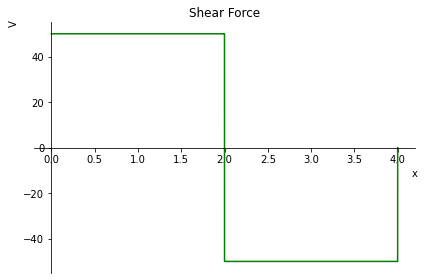

In [3]:
b.plot_shear_force()